# Feature engineering examples

## Introduction
This notebook illustrates some feature engineering capabilities provided by plaid-ops. 

In [1]:
import os

from datasets import load_dataset
from IPython.display import display
from PIL import Image
from plaid.bridges.huggingface_bridge import (
    huggingface_dataset_to_plaid,
    huggingface_description_to_problem_definition,
)

from plaid_ops.common.visualization import plot_field
from plaid_ops.mesh.feature_engineering import (
    compute_sdf,
    update_dataset_with_sdf,
    update_sample_with_sdf,
)

hf_dataset = load_dataset(
    "PLAID-datasets/2D_Multiscale_Hyperelasticity", split="all_samples"
)
pb_def = huggingface_description_to_problem_definition(hf_dataset.info.description)
ids = pb_def.get_split("DOE_train")[:2]
dataset, _ = huggingface_dataset_to_plaid(hf_dataset, ids=ids, processes_number=2)

/home/fabien/miniconda3/envs/plaid-ops/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Kokkos::OpenMP::initialize WARNING: OMP_PROC_BIND environment variable not set
  In general, for best performance with OpenMP 4.0 or better set OMP_PROC_BIND=spread and OMP_PLACES=threads
  For best performance with OpenMP 3.1 set OMP_PROC_BIND=true
  For unit testing set OMP_PROC_BIND=false



Converting Hugging Face dataset to plaid dataset...


100%|██████████| 2/2 [00:00<00:00, 157.72it/s]


In [2]:
sample = dataset[ids[0]]

print("[before update] 'sdf' in sample fields ?", "sdf" in sample.get_field_names())
updated_sample = update_sample_with_sdf(sample)
print(
    "[after update] 'sdf' in sample fields ?", "sdf" in updated_sample.get_field_names()
)

[before update] 'sdf' in sample fields ? False
[after update] 'sdf' in sample fields ? True


In [3]:
print(
    "[before update] 'sdf' in dataset fields ?",
    "sdf" in dataset[ids[0]].get_field_names(),
)
updated_dataset = update_dataset_with_sdf(dataset)
print(
    "[after update] 'sdf' in dataset fields ?",
    "sdf" in updated_dataset[ids[0]].get_field_names(),
)

[before update] 'sdf' in dataset fields ? False


[after update] 'sdf' in dataset fields ? True


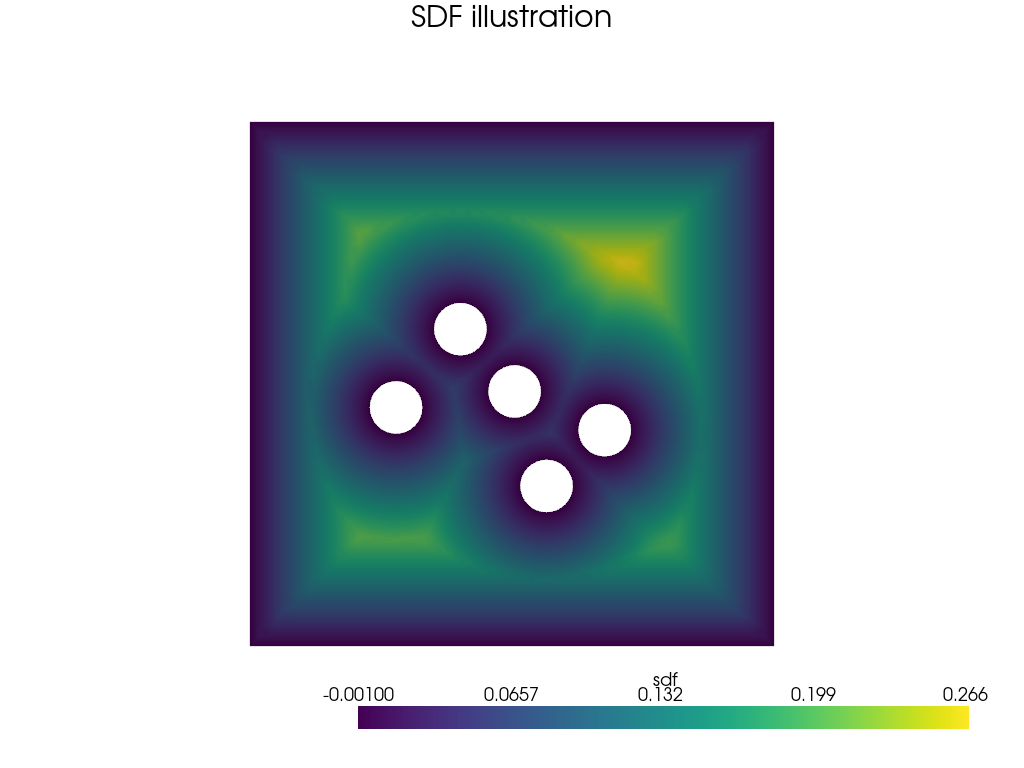

In [4]:
sample = dataset[ids[0]]
computed_sdf = compute_sdf(sample)

img_name = "feature_engineering_1.png"
if os.environ.get("READTHEDOCS") == "True":
    display(Image(filename=img_name))
else:
    img_array = plot_field(
        sample,
        computed_sdf,
        title="SDF illustration",
        scalar_bar_args={"title": "sdf"},
    )
    img = Image.fromarray(img_array)
    img.save(img_name)
    display(img)